In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
inputevets_filtered = pd.read_csv("filtered\\input_events_filtered_by_subject_id_and_medicine.csv")
chartevents_filtered = pd.read_csv("filtered\\filtered_chartevents.csv")
icustays_filtered = pd.read_csv("filtered\\filtered_icustays.csv")
patients_filtered = pd.read_csv("filtered\\filtered_patients.csv")
procedureevents_filtered = pd.read_csv("filtered\\filtered_procedureevents.csv")
labevents_filtered = pd.read_csv("filtered\\filtered_labevents.csv")
transfers_filtered = pd.read_csv("filtered\\filtered_transfers.csv")
itemid = pd.read_csv("data\\icu\\d_items.csv")

C:\Users\Yuval-PC\anaconda_new\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Yuval-PC\anaconda_new\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (9,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
icustays_filtered["same"] = (icustays_filtered["first_careunit"] == icustays_filtered["last_careunit"])

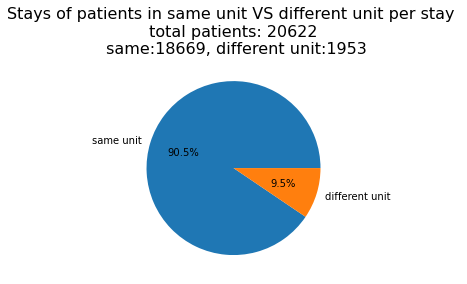

In [70]:
plt.pie(icustays_filtered["same"].value_counts(), autopct='%1.1f%%', labels=["same unit", "different unit"])
total_num = icustays_filtered["stay_id"].count()
same_unit = icustays_filtered["same"].value_counts()[True]
different_unit = icustays_filtered["same"].value_counts()[False]
plt.title(f"Stays of patients in same unit VS different unit per stay \n total stays: {total_num} \n same:{same_unit}, different unit:{different_unit}" , fontsize=16)
plt.savefig("Same unit vs different unit of icu stay")

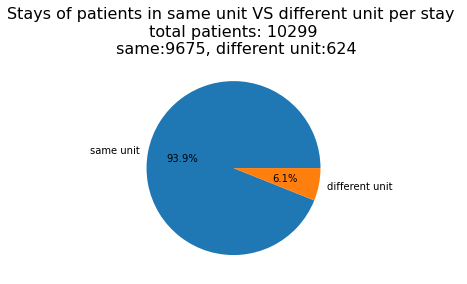

In [68]:
subject_ids_icustays = icustays_filtered.groupby(by="subject_id").agg({"same":"sum"})
plt.pie((subject_ids_icustays["same"] > 0).value_counts(), autopct='%1.1f%%', labels=["same unit", "different unit"])
total_num = (subject_ids_icustays["same"] > 0).count()
same_unit = (subject_ids_icustays["same"] > 0).value_counts()[True]
different_unit = (subject_ids_icustays["same"] > 0).value_counts()[False]
plt.title(f"Amount of patients with at least one stay in same unit VS different unit per stay \n total patients: {total_num} \n same:{same_unit}, different unit:{different_unit}" , fontsize=16)
plt.savefig("Same unit vs different unit of subject ids")